In [1]:
#Data Fetching
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [2]:
#Overview of the data
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-12,4.848837,4.862487,4.727729,4.822779,328338096
2005-01-13,4.847597,4.898721,4.815830,4.848838,275002929
2005-01-14,4.962751,4.963743,4.817816,4.864225,387057368
2005-01-18,5.060283,5.088078,4.930239,4.987567,528878966
2005-01-19,4.896488,5.095027,4.881845,5.078896,451995865


In [3]:
google_data.shape

(5032, 5)

In [4]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,48.791854,49.286327,48.283511,48.770640,1.085071e+08
std,46.705206,47.195266,46.214642,46.674445,1.417711e+08
min,4.342810,4.427437,4.282752,4.350503,1.584340e+05
25%,13.323509,13.473158,13.179939,13.351613,2.653468e+07
50%,28.105812,28.416848,27.871536,28.164944,5.033702e+07
75%,64.753830,65.268043,64.424885,64.736646,1.322298e+08
max,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-01-12 to 2025-01-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [6]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [7]:
#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

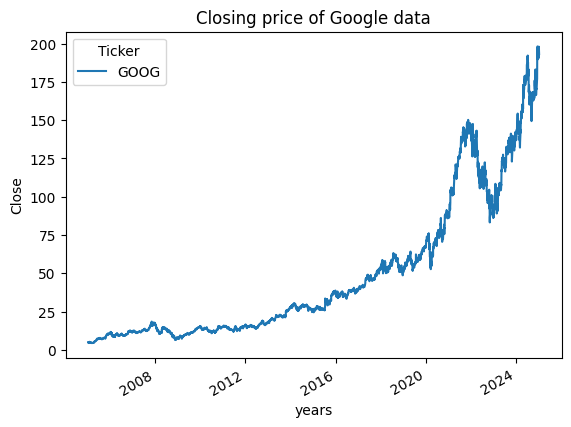

In [8]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [9]:
#Reusable Function to generalize plotting for any column.
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [10]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

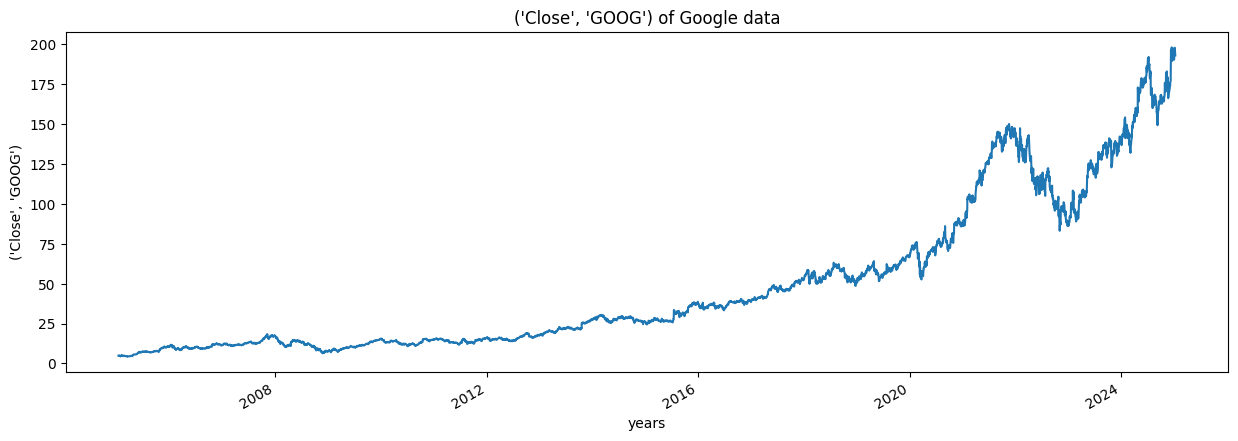

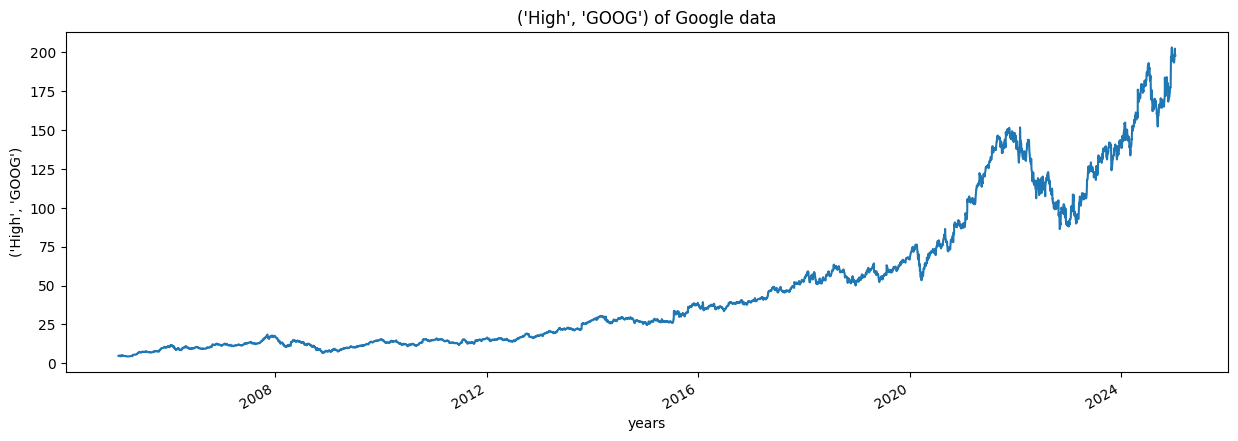

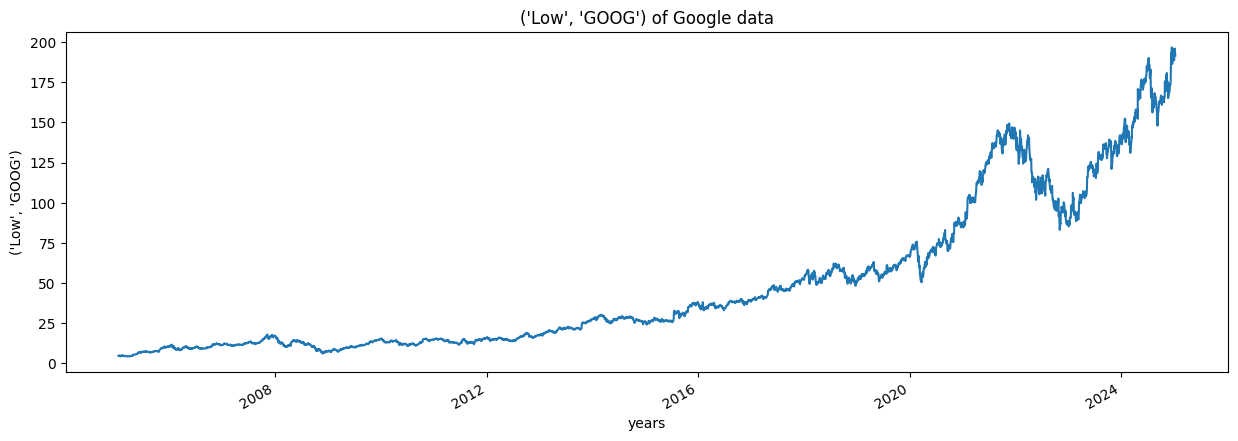

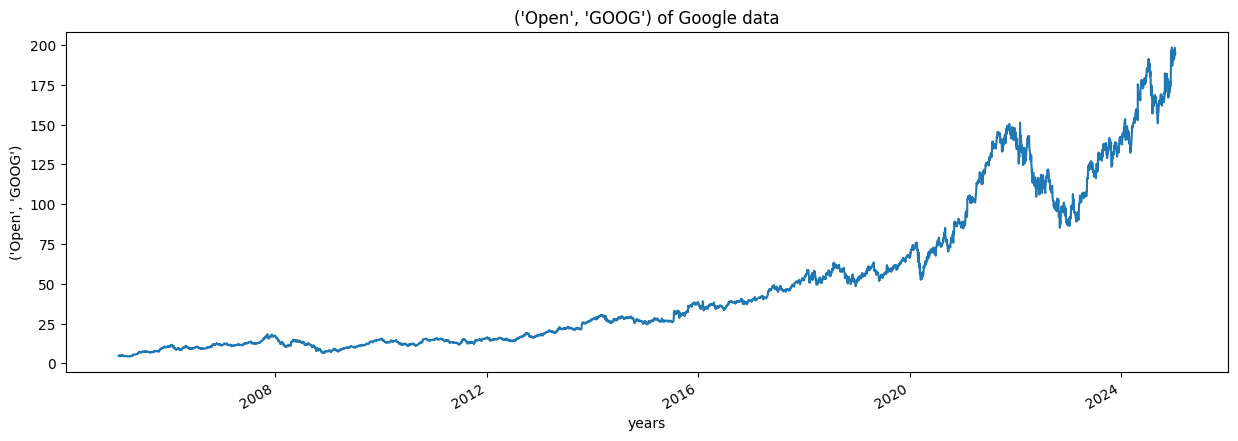

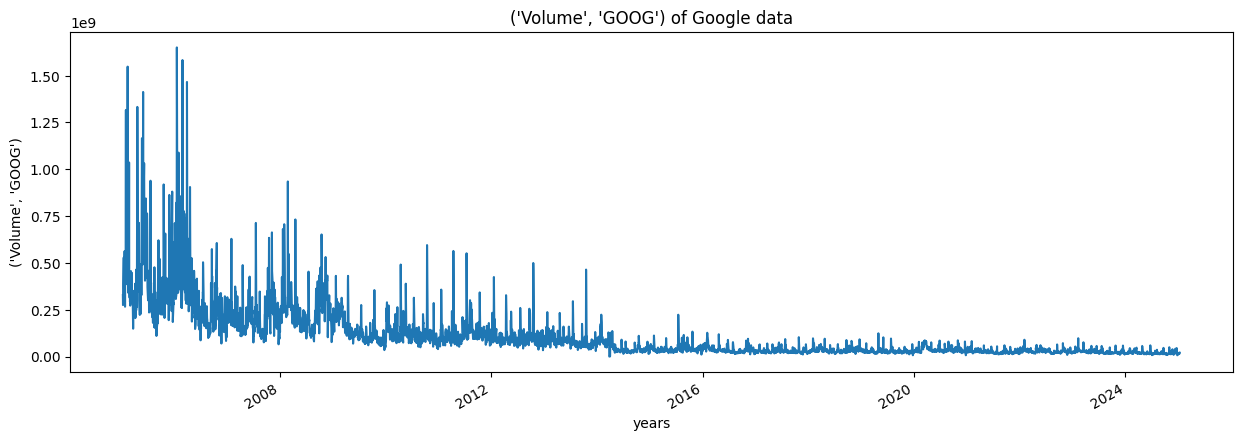

In [11]:
#Plotting graph for each column
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [12]:
#Rolling Window
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [13]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [14]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()
google_data['MA_for_250_days'][0:250].tail()

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09    7.038021
Name: MA_for_250_days, dtype: float64

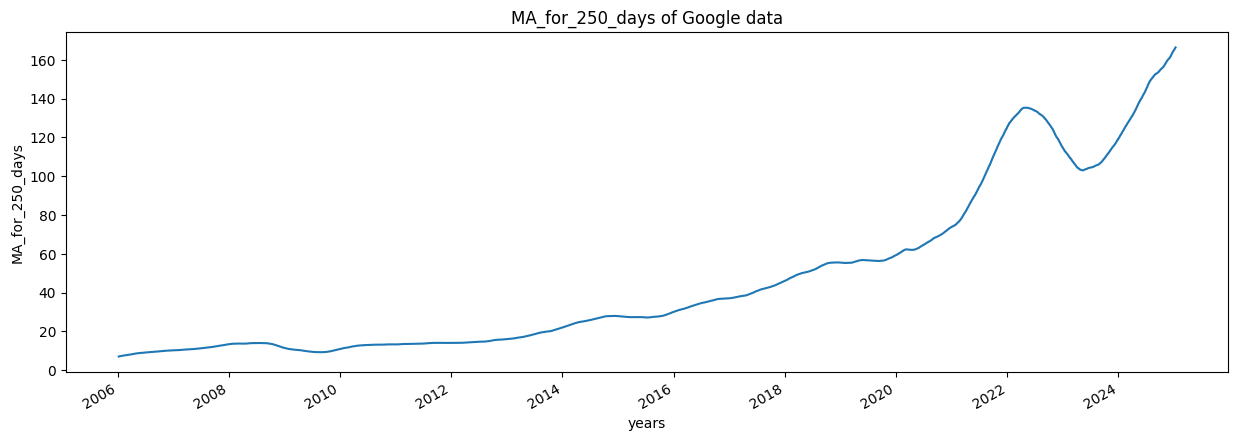

In [15]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

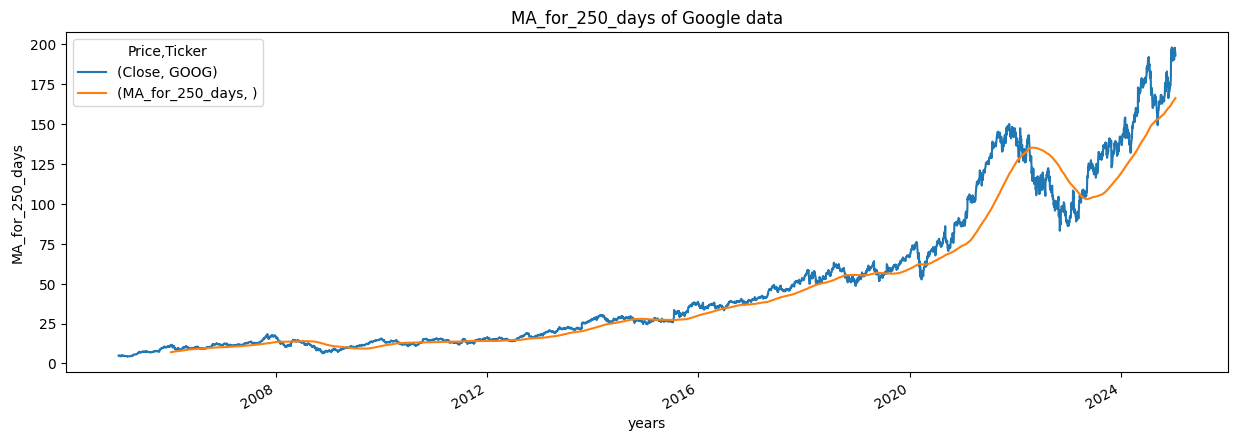

In [16]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

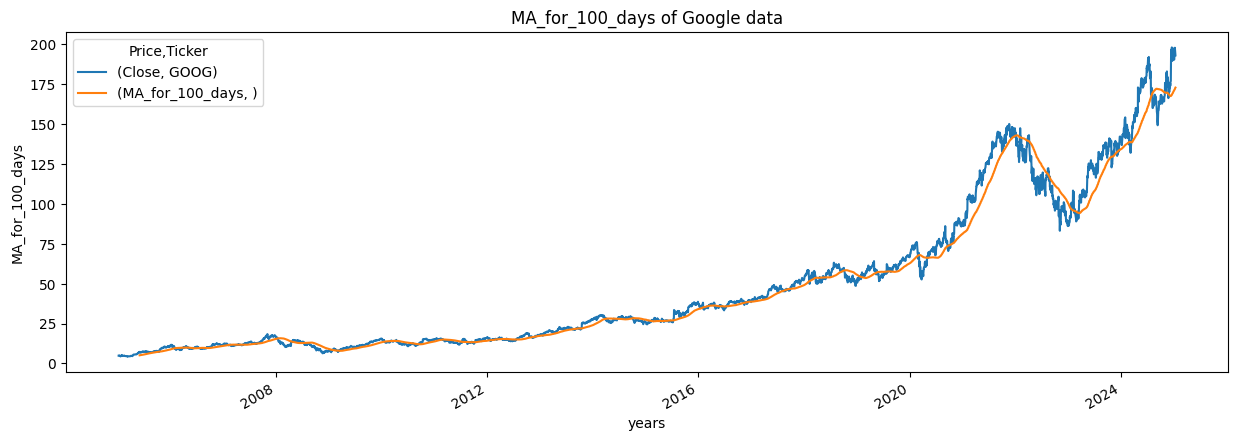

In [17]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

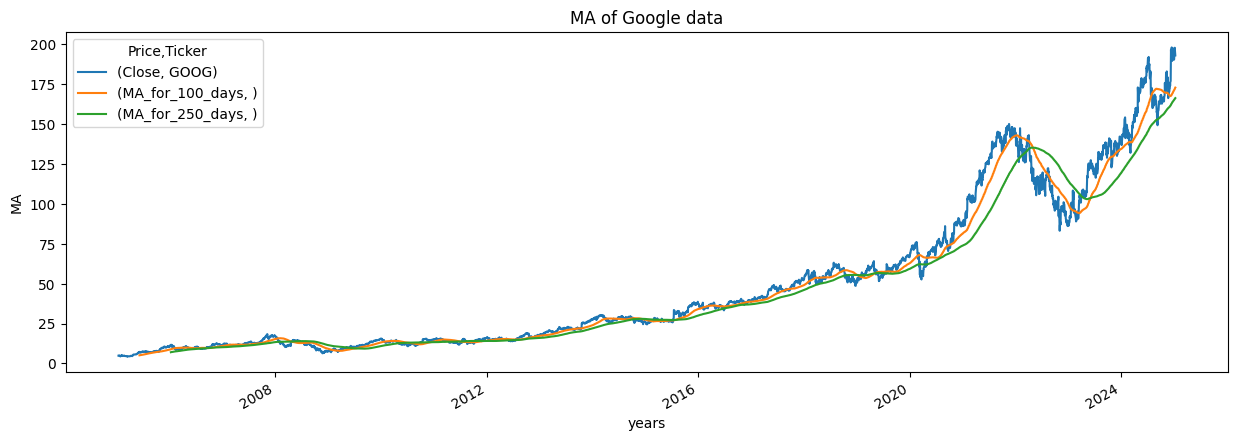

In [18]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [19]:
#Calculates daily percentage changes.
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-12,4.848837,NaN
2005-01-13,4.847597,-0.000256
2005-01-14,4.962751,0.023755
2005-01-18,5.060283,0.019653
2005-01-19,4.896488,-0.032369


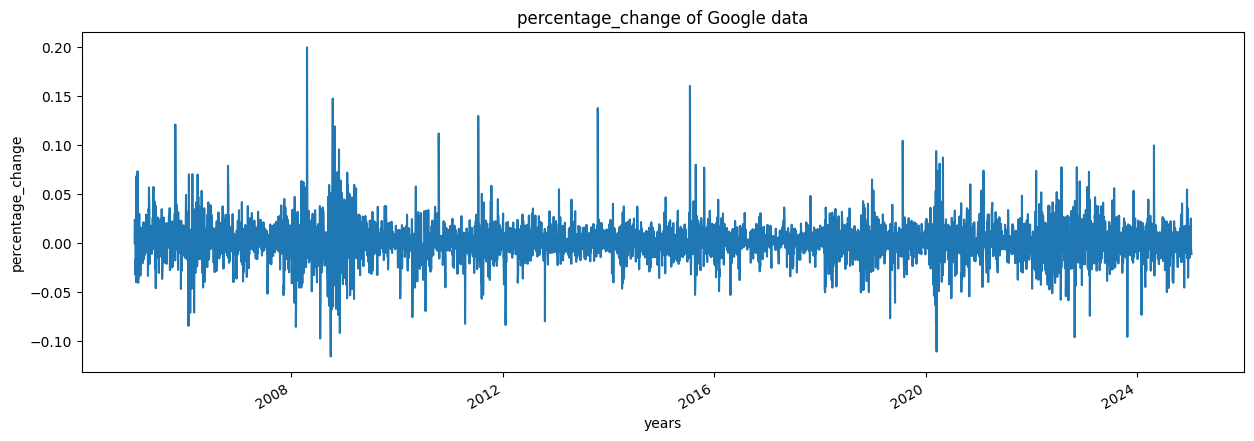

In [21]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [22]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler

close_price = google_data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))    #Scales data to the range [0, 1].
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00261085],
       [0.00260445],
       [0.00319858],
       ...,
       [0.99251874],
       [0.98570816],
       [0.97425406]])

In [24]:
#Data Preparation for Time Series Modeling

x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

5034-100-int(len(x_data)*0.7)

1482

In [25]:
#Train-Test Split
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [26]:
#Building the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))  # First LSTM layer
model.add(LSTM(64,return_sequences=False))  # Second LSTM layer
model.add(Dense(25))  # Fully connected layer with 25 neurons
model.add(Dense(1))   # Output layer with 1 neuron
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Udi Gupta\Desktop\tf\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)   #Trains the model for 2 epochs with a batch size of 1

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 261s 74ms/step - loss: 3.3551e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 247s 72ms/step - loss: 9.4065e-05


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [29]:
#Predicting Test Data
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step


In [30]:
inv_predictions = scaler.inverse_transform(predictions)  #Converts predictions back to their original scale
inv_predictions

array([[ 56.298977],
       [ 56.325874],
       [ 56.4747  ],
       ...,
       [189.73407 ],
       [191.05417 ],
       [191.12473 ]], dtype=float32)

In [31]:
inv_y_test = scaler.inverse_transform(y_test)  #Converts labels back to their original scale
inv_y_test

array([[ 55.27140808],
       [ 55.55688095],
       [ 55.60271835],
       ...,
       [196.71000671],
       [195.38999939],
       [193.16999817]])

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print("Root Mean Squared Error (RMSE):")
print(rmse)


Root Mean Squared Error (RMSE):
2.922191350949462


In [33]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-25,55.271408,56.298977
2019-02-26,55.556881,56.325874
2019-02-27,55.602718,56.474701
2019-02-28,55.795521,56.616837
2019-03-01,56.845249,56.770977


<Figure size 640x480 with 0 Axes>

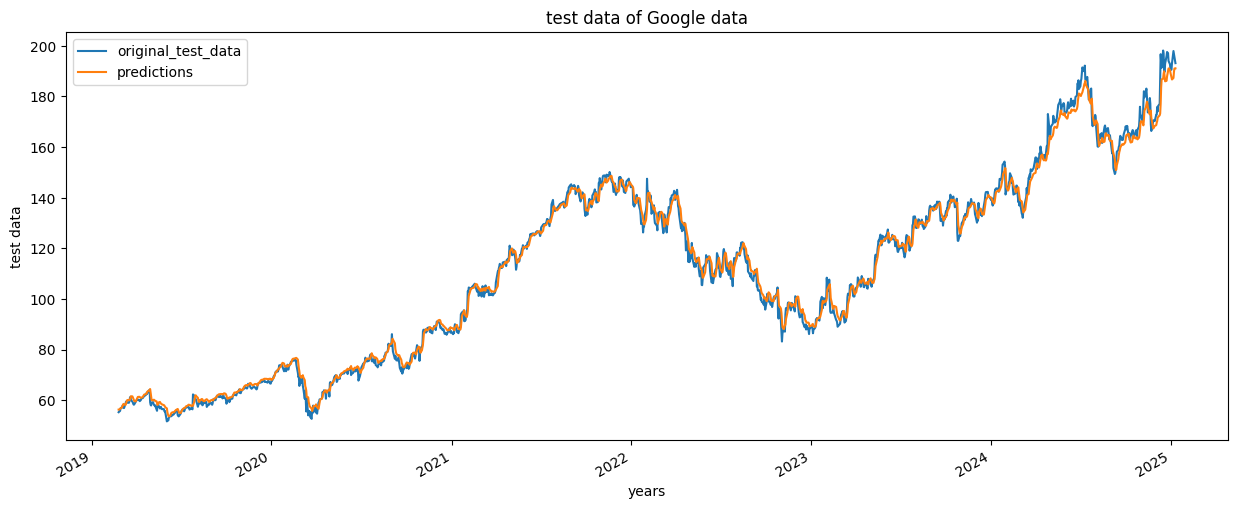

In [34]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

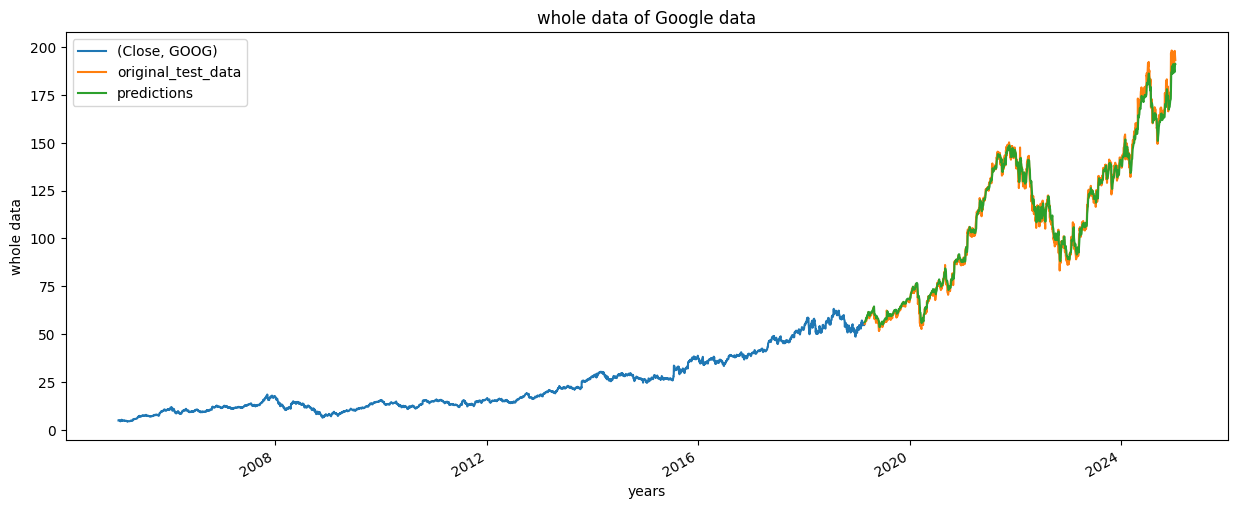

In [35]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [36]:
model.save("Latest_stock_price_model.keras")